## Data preprocessing:
1.  Given the column “Year of born”, please calculate the value for column “Age” in Sheet 1 “Individual”.

2.  Calculate the “Total Donation Amount” for each donor in the first three sheets “Individual”, “Organization (Public)” and “Organization (Private)”, respectively. 

3.  Calculate the rank for each donor in the first three sheet. Sort the data in ascending order by the rank. 

4.  Create a composite rank list that includes all donors from the first three sheets, using the “Total Donation Amount” that you calculated in Question 2. 

5.  Fill the column “Industry” in Sheet 4 “Composite Rank” using the information in the first three sheets. 

In [158]:
#import python packages
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder

In [159]:
# 加载Excel文件
#!pip install openpyxl
xls = pd.ExcelFile('Excel Test.xlsx')

# 分别读取Excel中的每个Sheet
individual = pd.read_excel(xls, '1. Individual')
organization_public = pd.read_excel(xls, '2. Organization (Public)')
organization_private = pd.read_excel(xls, '3. Organization (Private)')
composite_rank = pd.read_excel(xls, '4. Composite Rank')

In [160]:
individual.head(3)

,Rank,Total Amount,Name (CN),Year born,Age,Sex,Industry,Donation Amount (mil ¥),Donation Month,Donation Date,...,Donation Destination (Province),Donation Destination (City),Name of Recipient,Name of Recipient (CN),Donation for what program?,Type of Recipient,Donation Cause,Donation Vehicle,Form of Donation,Pledge? (Y/N)
0,NaN,NaN,陈天桥,1974,NaN,M,Software and Internet,747.5,12.0,7.0,...,"CA, USA",Pasadena,NaN,加州理工学院,创建神经科学研究所,University or University Foundation,Education,Individual,Cash,N
1,NaN,NaN,曹德旺,1985,NaN,NaN,Manufacturing,250.0,11.0,27.0,...,NaN,NaN,NaN,黄檗山万福禅寺,重兴黄檗山万福禅寺,NGO,Culture,NaN,Cash,N
2,NaN,NaN,吴少勋,1961,NaN,M,Consumer,113.0,1.0,28.0,...,Hubei,Wuhan,NaN,湖北慈善总会,大冶体育公园,Government Charitable Organization,Social Welfare & Poverty Alleviation,Individual,Cash,N


In [161]:
organization_public.head(3)

,Rank,Total Amount,Organization Name (CN),Industry,Donation Amount (mil ¥),Donation Month,Donation Date,Donation Origin (Province),Donation Origin (City),Donation Destination (Province),Donation Destination (City),Name of Recipient,Name of Recipient (CN),Donation for what program?,Type of Recipient,Donation Cause,Donation Vehicle,Form of Donation,Pledge? (Y/N)
0,NaN,NaN,中国长江三峡集团公司,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"屏山县,宜宾县,贫困村,社区",扶贫,Government,Social Welfare & Poverty Alleviation,Corporation,Cash,N
1,NaN,NaN,中国长江三峡集团公司,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,福州市、莆田市灾区,救灾,Government,Disaster Relief,Corporation,Cash,N
2,NaN,NaN,中国长江三峡集团公司,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,江苏、福建灾区,救灾,Government,Disaster Relief,Corporation,Cash,N


In [162]:
organization_private.head(3)

,Rank,Total Amount,Organization Name (CN),Industry,Donation Amount (mil ¥),Donation Month,Donation Date,Donation Origin (Province),Donation Origin (City),Donation Destination (Province),Donation Destination (City),Name of Recipient,Name of Recipient (CN),Donation for what program?,Type of Recipient,Donation Cause,Form of Donation,Pledge? (Y/N)
0,NaN,NaN,恒大集团,Real Estate,1000.0,1.0,8.0,Guangdong,Guangzhou,Guizhou,Bijie,NaN,贵州大方县政府,并设立10亿元产业扶贫专项贷款担保基金、举办四期共4000人的吸纳贫困家庭劳动力就业培训、同...,Government,Social Welfare & Poverty Alleviation,Cash,N
1,NaN,NaN,建业集团,NaN,750.0,9.0,5.0,Henan,Zhengzhou,Henan,Zhengzhou,NaN,河南省慈善总会,深入学习贯彻“慈善法”,NaN,Unspecified,Cash,NaN
2,NaN,NaN,元林基金会,Manufacturing,500.0,2.0,29.0,Jiangsu,Jiangyin,Jiangsu,Jiangyin,Jiangyin Government,江阴市政府,建康复医院,Government,Public Health,Cash,N


In [163]:
composite_rank.head(3)

,Name,Total Amount,Composite Rank,Category (Public/Private/Individual),Industry


### 1.  Given the column “Year of born”, please calculate the value for column “Age” in Sheet 1 “Individual”.

In [164]:
from datetime import datetime

# Calculate the age
current_year = datetime.now().year
individual['Age'] = current_year - individual['Year born']

In [165]:
individual.head(3)

,Rank,Total Amount,Name (CN),Year born,Age,Sex,Industry,Donation Amount (mil ¥),Donation Month,Donation Date,...,Donation Destination (Province),Donation Destination (City),Name of Recipient,Name of Recipient (CN),Donation for what program?,Type of Recipient,Donation Cause,Donation Vehicle,Form of Donation,Pledge? (Y/N)
0,NaN,NaN,陈天桥,1974,49,M,Software and Internet,747.5,12.0,7.0,...,"CA, USA",Pasadena,NaN,加州理工学院,创建神经科学研究所,University or University Foundation,Education,Individual,Cash,N
1,NaN,NaN,曹德旺,1985,38,NaN,Manufacturing,250.0,11.0,27.0,...,NaN,NaN,NaN,黄檗山万福禅寺,重兴黄檗山万福禅寺,NGO,Culture,NaN,Cash,N
2,NaN,NaN,吴少勋,1961,62,M,Consumer,113.0,1.0,28.0,...,Hubei,Wuhan,NaN,湖北慈善总会,大冶体育公园,Government Charitable Organization,Social Welfare & Poverty Alleviation,Individual,Cash,N


### 2. Calculate the “Total Donation Amount” for each donor in the first three sheets “Individual”, “Organization (Public)” and “Organization (Private)”, respectively. 


In [166]:
individual['Total Amount'] = individual.groupby('Name (CN)')['Donation Amount (mil ¥)'].transform('sum')
organization_public['Total Amount'] = organization_public.groupby('Organization Name (CN)')['Donation Amount (mil ¥)'].transform('sum')
organization_private['Total Amount'] = organization_private.groupby('Organization Name (CN)')['Donation Amount (mil ¥)'].transform('sum')

In [167]:
individual.head(3)

,Rank,Total Amount,Name (CN),Year born,Age,Sex,Industry,Donation Amount (mil ¥),Donation Month,Donation Date,...,Donation Destination (Province),Donation Destination (City),Name of Recipient,Name of Recipient (CN),Donation for what program?,Type of Recipient,Donation Cause,Donation Vehicle,Form of Donation,Pledge? (Y/N)
0,NaN,747.5,陈天桥,1974,49,M,Software and Internet,747.5,12.0,7.0,...,"CA, USA",Pasadena,NaN,加州理工学院,创建神经科学研究所,University or University Foundation,Education,Individual,Cash,N
1,NaN,250.0,曹德旺,1985,38,NaN,Manufacturing,250.0,11.0,27.0,...,NaN,NaN,NaN,黄檗山万福禅寺,重兴黄檗山万福禅寺,NGO,Culture,NaN,Cash,N
2,NaN,114.0,吴少勋,1961,62,M,Consumer,113.0,1.0,28.0,...,Hubei,Wuhan,NaN,湖北慈善总会,大冶体育公园,Government Charitable Organization,Social Welfare & Poverty Alleviation,Individual,Cash,N


In [168]:
organization_private.head(3)

,Rank,Total Amount,Organization Name (CN),Industry,Donation Amount (mil ¥),Donation Month,Donation Date,Donation Origin (Province),Donation Origin (City),Donation Destination (Province),Donation Destination (City),Name of Recipient,Name of Recipient (CN),Donation for what program?,Type of Recipient,Donation Cause,Form of Donation,Pledge? (Y/N)
0,NaN,1054.0,恒大集团,Real Estate,1000.0,1.0,8.0,Guangdong,Guangzhou,Guizhou,Bijie,NaN,贵州大方县政府,并设立10亿元产业扶贫专项贷款担保基金、举办四期共4000人的吸纳贫困家庭劳动力就业培训、同...,Government,Social Welfare & Poverty Alleviation,Cash,N
1,NaN,850.0,建业集团,NaN,750.0,9.0,5.0,Henan,Zhengzhou,Henan,Zhengzhou,NaN,河南省慈善总会,深入学习贯彻“慈善法”,NaN,Unspecified,Cash,NaN
2,NaN,500.0,元林基金会,Manufacturing,500.0,2.0,29.0,Jiangsu,Jiangyin,Jiangsu,Jiangyin,Jiangyin Government,江阴市政府,建康复医院,Government,Public Health,Cash,N


In [169]:
organization_public.head(3)

,Rank,Total Amount,Organization Name (CN),Industry,Donation Amount (mil ¥),Donation Month,Donation Date,Donation Origin (Province),Donation Origin (City),Donation Destination (Province),Donation Destination (City),Name of Recipient,Name of Recipient (CN),Donation for what program?,Type of Recipient,Donation Cause,Donation Vehicle,Form of Donation,Pledge? (Y/N)
0,NaN,570.4,中国长江三峡集团公司,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"屏山县,宜宾县,贫困村,社区",扶贫,Government,Social Welfare & Poverty Alleviation,Corporation,Cash,N
1,NaN,570.4,中国长江三峡集团公司,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,福州市、莆田市灾区,救灾,Government,Disaster Relief,Corporation,Cash,N
2,NaN,570.4,中国长江三峡集团公司,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,江苏、福建灾区,救灾,Government,Disaster Relief,Corporation,Cash,N


### 3.  Calculate the rank for each donor in the first three sheet. Sort the data in ascending order by the rank. 

In [170]:
individual_grouped = individual.groupby(['Name (CN)'])['Donation Amount (mil ¥)'].sum().reset_index()


In [171]:
individual_grouped['Rank'] = individual_grouped['Donation Amount (mil ¥)'].rank(method='dense', ascending=False)

In [172]:
individual_grouped.head(3)

,Name (CN),Donation Amount (mil ¥),Rank
0,JACKIE XIAOBEI WU,1.0,47.0
1,丁韶华,10.0,16.0
2,丘文漳,0.3,62.0


In [173]:
individual.set_index('Name (CN)', inplace=True)
individual_grouped.set_index('Name (CN)', inplace=True)
individual.update(individual_grouped)
individual.reset_index(inplace=True)
individual.head(10)

,Name (CN),Rank,Total Amount,Year born,Age,Sex,Industry,Donation Amount (mil ¥),Donation Month,Donation Date,...,Donation Destination (Province),Donation Destination (City),Name of Recipient,Name of Recipient (CN),Donation for what program?,Type of Recipient,Donation Cause,Donation Vehicle,Form of Donation,Pledge? (Y/N)
0,陈天桥,1.0,747.500000,1974,49,M,Software and Internet,747.500000,12.0,7.0,...,"CA, USA",Pasadena,NaN,加州理工学院,创建神经科学研究所,University or University Foundation,Education,Individual,Cash,N
1,曹德旺,2.0,250.000000,1985,38,NaN,Manufacturing,250.000000,11.0,27.0,...,NaN,NaN,NaN,黄檗山万福禅寺,重兴黄檗山万福禅寺,NGO,Culture,NaN,Cash,N
2,吴少勋,3.0,114.000000,1961,62,M,Consumer,114.000000,1.0,28.0,...,Hubei,Wuhan,NaN,湖北慈善总会,大冶体育公园,Government Charitable Organization,Social Welfare & Poverty Alleviation,Individual,Cash,N
3,周锦霆,5.0,100.000000,1953,70,M,Software and Internet,100.000000,3.0,29.0,...,Sichuan,Chengdu,NaN,电子科技大学,荷福研究院,University or University Foundation,Education,Individual,Cash,N
4,朱永宁,5.0,100.000000,1966,57,M,Software and Internet,100.000000,11.0,28.0,...,Jiangsu,Nanjing,NaN,南京大学,南京大学博物馆,University or University Foundation,Education,Individual,Cash,N
5,张宗真,5.0,100.000000,1953,70,M,Real Estate,100.000000,6.0,16.0,...,Fujian,Fuzhou,NaN,福建承群慈善基金,成立“承群基金会”,Non-Government Foundation,Disaster Relief,Individual,Cash,N
6,吴亚军,5.0,100.000000,1971,52,F,Real Estate,100.000000,10.0,15.0,...,Shaanxi,Xi'an,Northwestern Polytechnical University,西北工业大学,西北工业大学校友讲席教授基金,University or University Foundation,Education,Individual,Cash,N
7,许健康,5.0,100.000000,1955,68,M,Real Estate,100.000000,4.0,6.0,...,Fujian,Jinjiang,NaN,福建省晋江市安海镇溪边村,“美丽乡村”建设及实施可持续发展项目,Government,Social Welfare & Poverty Alleviation,Individual,Cash,N
8,马化腾,4.0,107.871963,1968,55,M,Software and Internet,107.871963,12.0,5.0,...,Hubei,Wuhan,Wuhan College,武汉学院,湖北一丹大学教育发展基金会,University or University Foundation,Education,Individual,Cash,N
9,纪海鹏,5.0,100.000000,1960,63,M,Real Estate,100.000000,2.0,2.0,...,Guangdong,Guangzhou,NaN,龙光慈善基金会,NaN,Non-Government Foundation,Unspecified,Individual,Cash,Y


In [174]:
org_public_grouped = organization_public.groupby(['Organization Name (CN)'])['Donation Amount (mil ¥)'].sum().reset_index()
org_public_grouped['Rank'] = org_public_grouped['Donation Amount (mil ¥)'].rank(method='dense', ascending=False)
organization_public.set_index('Organization Name (CN)', inplace=True)
org_public_grouped.set_index('Organization Name (CN)', inplace=True)
organization_public.update(org_public_grouped)
organization_public.reset_index(inplace=True)
organization_public.head(10)

,Organization Name (CN),Rank,Total Amount,Industry,Donation Amount (mil ¥),Donation Month,Donation Date,Donation Origin (Province),Donation Origin (City),Donation Destination (Province),Donation Destination (City),Name of Recipient,Name of Recipient (CN),Donation for what program?,Type of Recipient,Donation Cause,Donation Vehicle,Form of Donation,Pledge? (Y/N)
0,中国长江三峡集团公司,1.0,570.4,NaN,570.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"屏山县,宜宾县,贫困村,社区",扶贫,Government,Social Welfare & Poverty Alleviation,Corporation,Cash,N
1,中国长江三峡集团公司,1.0,570.4,NaN,570.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,福州市、莆田市灾区,救灾,Government,Disaster Relief,Corporation,Cash,N
2,中国长江三峡集团公司,1.0,570.4,NaN,570.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,江苏、福建灾区,救灾,Government,Disaster Relief,Corporation,Cash,N
3,中国长江三峡集团公司,1.0,570.4,NaN,570.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,云南扶贫,扶贫,Government,Social Welfare & Poverty Alleviation,Corporation,Cash,N
4,中国长江三峡集团公司,1.0,570.4,NaN,570.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"湖北灾区,",救灾,Government,Disaster Relief,Corporation,Cash,N
5,中国长江三峡集团公司,1.0,570.4,NaN,570.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,四川宜宾屏山扶贫,扶贫,Government,Social Welfare & Poverty Alleviation,Corporation,Cash,N
6,茅台集团,2.0,100.0,NaN,100.0,6.0,13.0,Guizhou,Zunyi,NaN,NaN,NaN,20000名贫困家庭的大学新生,国酒茅台•国之栋梁—— 2016希望工程圆梦行动,Individual(s),Education,Corporate Foundation,Cash,N
7,浙江中烟工业有限责任公司,3.0,97.0,NaN,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,浙江大学教育基金会,浙江大学紫金港校区二期建设,University or University Foundation,Education,Corporation,Cash,N
8,浙江中烟工业有限责任公司,3.0,97.0,NaN,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,浙江大学教育基金会,高分子系吸附分离材料联合实验室,University or University Foundation,Education,Corporation,Cash,N
9,浙江中烟工业有限责任公司,3.0,97.0,NaN,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,浙江大学教育基金会,软件学院人才培养与学科建设专项基金,University or University Foundation,Education,Corporation,Cash,N


In [175]:
org_private_grouped = organization_private.groupby(['Organization Name (CN)'])['Donation Amount (mil ¥)'].sum().reset_index()
org_private_grouped['Rank'] = org_private_grouped['Donation Amount (mil ¥)'].rank(method='dense', ascending=False)
organization_private.set_index('Organization Name (CN)', inplace=True)
org_private_grouped.set_index('Organization Name (CN)', inplace=True)
organization_private.update(org_private_grouped)
organization_private.reset_index(inplace=True)
organization_private.head(10)

,Organization Name (CN),Rank,Total Amount,Industry,Donation Amount (mil ¥),Donation Month,Donation Date,Donation Origin (Province),Donation Origin (City),Donation Destination (Province),Donation Destination (City),Name of Recipient,Name of Recipient (CN),Donation for what program?,Type of Recipient,Donation Cause,Form of Donation,Pledge? (Y/N)
0,恒大集团,1.0,1054.0,Real Estate,1054.0,1.0,8.0,Guangdong,Guangzhou,Guizhou,Bijie,NaN,贵州大方县政府,并设立10亿元产业扶贫专项贷款担保基金、举办四期共4000人的吸纳贫困家庭劳动力就业培训、同...,Government,Social Welfare & Poverty Alleviation,Cash,N
1,建业集团,2.0,850.0,NaN,850.0,9.0,5.0,Henan,Zhengzhou,Henan,Zhengzhou,NaN,河南省慈善总会,深入学习贯彻“慈善法”,NaN,Unspecified,Cash,NaN
2,元林基金会,3.0,500.0,Manufacturing,500.0,2.0,29.0,Jiangsu,Jiangyin,Jiangsu,Jiangyin,Jiangyin Government,江阴市政府,建康复医院,Government,Public Health,Cash,N
3,海亮集团有限公司,6.0,250.0,Manufacturing,250.0,12.0,30.0,Zhejiang,Hangzhou,Zhejiang,Hangzhou,Zhejiang University Education Foundation,浙江大学教育基金会,用于支持浙江大学肿瘤学科的建设和医学人才的培养，以及加强医院的医疗技术力量。,University or University Foundation,Public Health,Cash,N
4,广东省国强公益基金会,9.0,202.0,NaN,202.0,12.0,9.0,Guangdong,Foshan,Guangdong,Guangzhou,NaN,广东省扶贫基金会,NaN,Government Charitable Organization,Unspecified,Cash,N
5,劲牌有限公司,5.0,300.0,NaN,300.0,4.0,8.0,Hubei,Daye,NaN,NaN,NaN,大冶市政府,生态公园建设,Government,Social Welfare & Poverty Alleviation,Cash,Y
6,北京科艺创新文化发展有限公司,10.0,200.0,Entertainment,200.0,5.0,13.0,Beijing,Beijing,Beijing,Beijing,NaN,中国科学院大学,新成立的艺术中心,University or University Foundation,Education,Cash,N
7,歌尔股份有限公司,10.0,200.0,Manufacturing,200.0,5.0,3.0,Shandong,Weifang,Beijing,Beijing,Beihang University,北京航空航天大学,用于前沿科学研究及高新技术成果产业化、高端人才国际化培养、优秀学生资助与奖励、学生创新创业空...,University or University Foundation,Education,Cash,N
8,泰禾集团,7.0,240.0,Real Estate,240.0,10.0,31.0,Fujian,Fuzhou,Guangdong,Shenzhen,Institute for Hospital Management of Tsinghua ...,清华大学医院管理研究院,泰禾清华医管基金,University or University Foundation,Education,Cash,N
9,浙江通策控股集团有限公司,10.0,200.0,Finance,200.0,2.0,1.0,Zhejiang,Hangzhou,Beijing,Beijing,NaN,中国科学院大学存济医学院,用于建设存济医学院大楼,University or University Foundation,Education,Cash,N


In [176]:
# Create a new coloumn 'Category' for these three tables
individual['Category'] = 'Individual'
organization_public['Category']='Public'
organization_private['Category']='private'

In [177]:
#Extract the required columns and remove them
individual_subset = individual[['Name (CN)', 'Total Amount', 'Category', 'Industry']].drop_duplicates()
organization_public_subset = organization_public[['Organization Name (CN)', 'Total Amount', 'Category', 'Industry']].drop_duplicates()
organization_private_subset = organization_private[['Organization Name (CN)', 'Total Amount', 'Category', 'Industry']].drop_duplicates()

In [178]:
# Rename the columns so that they are consistent across all datasets
individual_subset.columns = ['Name', 'Total Amount', 'Category (Public/Private/Individual)', 'Industry']
organization_public_subset.columns = ['Name', 'Total Amount', 'Category (Public/Private/Individual)', 'Industry']
organization_private_subset.columns = ['Name', 'Total Amount', 'Category (Public/Private/Individual)', 'Industry']


In [179]:
# Concat 3 tables
composite_rank = pd.concat([individual_subset, organization_public_subset, organization_private_subset])

In [180]:
#Drop duplicate Rows
composite_rank = composite_rank.drop_duplicates(subset=['Name', 'Total Amount', 'Category (Public/Private/Individual)'])

In [181]:
composite_rank.head(4)

,Name,Total Amount,Category (Public/Private/Individual),Industry
0,陈天桥,747.5,Individual,Software and Internet
1,曹德旺,250.0,Individual,Manufacturing
2,吴少勋,114.0,Individual,Consumer
3,周锦霆,100.0,Individual,Software and Internet


### 5.  Fill the column “Industry” in Sheet 4 “Composite Rank” using the information in the first three sheets. 

In [182]:
# Create Column 'Composite Rank'
composite_rank['Composite Rank'] = composite_rank['Total Amount'].rank(method='min', ascending=False)

In [183]:
#Move this column to third column
cols=['Name','Total Amount','Composite Rank','Category (Public/Private/Individual)','Industry']
composite_rank = composite_rank[cols]

In [184]:
#Sort By 'Composite Rank'
composite_rank.sort_values('Composite Rank',inplace=True)

In [185]:
composite_rank.head(10)

,Name,Total Amount,Composite Rank,Category (Public/Private/Individual),Industry
0,恒大集团,1054.00,1.0,private,Real Estate
1,建业集团,850.00,2.0,private,NaN
0,陈天桥,747.50,3.0,Individual,Software and Internet
0,中国长江三峡集团公司,570.40,4.0,Public,NaN
2,元林基金会,500.00,5.0,private,Manufacturing
25,中国泛海控股集团,393.18,6.0,private,NaN
5,劲牌有限公司,300.00,7.0,private,NaN
3,海亮集团有限公司,250.00,8.0,private,Manufacturing
1,曹德旺,250.00,8.0,Individual,Manufacturing
8,泰禾集团,240.00,10.0,private,Real Estate


In [186]:
## Create a Output Excel
with pd.ExcelWriter('output.xlsx') as writer:  
    individual.to_excel(writer, sheet_name='Individual', index=False)
    organization_public.to_excel(writer, sheet_name='Organization (Public)', index=False)
    organization_private.to_excel(writer, sheet_name='Organization (Private)', index=False)
    composite_rank.to_excel(writer, sheet_name='Composite Rank', index=False)

# Data Visualization

## 1. Age distribution of donors: According to the "Age" column in the "Individual" table, you can analyze the age distribution of donors.

In [187]:
# Import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [188]:
#DROP NA
individual2 = individual[individual['Age'].notna()]


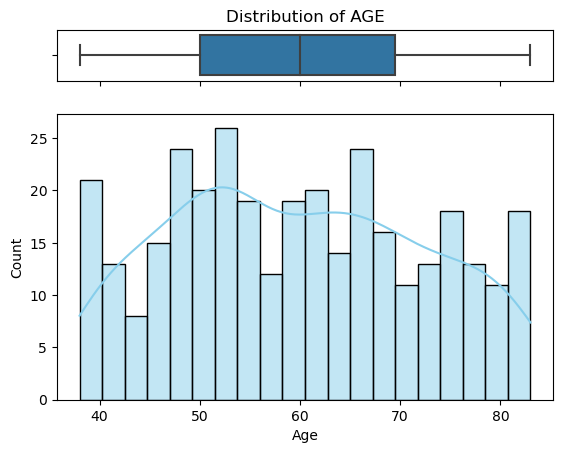

In [189]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=individual2, x='Age', ax=ax_box)
ax_box.set(xlabel='')

sns.histplot(data=individual, x='Age', bins=20, kde=True, ax=ax_hist, color='skyblue')

# Add the alpha parameter to violinplot to set transparency
#sns.violinplot(data=individual, x='Age', ax=ax_hist, color='lightgray', alpha=0.2)

ax_box.set_title('Distribution of AGE')
plt.show()

## Relationship Between AGE and Total Amount

In [190]:
fig = px.scatter(individual, x='Age', y='Total Amount', size='Total Amount', color='Total Amount',
                 hover_name='Name (CN)', hover_data={'Age': True, 'Total Amount': ':.2f'},
                 title='Donation Amount vs Age')

fig.update_xaxes(title='Age')
fig.update_yaxes(title='Donation Amount')

fig.show()

## 2. Distribution of donations by Industry: You can analyze the "Industry" column to see donations by industry.

In [191]:
import plotly.express as px

# 对 'Industry' 列进行分组，并计算每个行业的捐款总额
industry_donations = composite_rank.groupby('Industry')['Total Amount'].sum().reset_index()

# 创建扇形图
fig = px.pie(industry_donations, values='Total Amount', names='Industry', title='Industry Donations Distribution')

fig.show()

3. Analyze the ranking distribution of donations, such as the top 10 donors or organizations, the proportion of their donations, etc

In [192]:
# Find out the top 10 donors
top_10_donors = composite_rank.head(10)

In [193]:
# Calculate the total amount of top 10 donors
total_donations = top_10_donors['Total Amount'].sum()

In [194]:
# Calculate the percentage of donations made by the top 10 donors or organizations
donation_percentages = (top_10_donors['Total Amount'] / total_donations * 100).tolist()

In [195]:
labels = top_10_donors['Name']
values = donation_percentages
pull = [0] * len(labels)  
max_percentage = max(donation_percentages)  
max_index = donation_percentages.index(max_percentage)  
pull[max_index] =0.3
 
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=pull,hole=.4)])
fig.update_layout(title='Top 10 Donors - Donation Amount Percentage')
fig.show()

/Users/limuqing/anaconda3/envs/tf_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 24658 (\N{CJK UNIFIED IDEOGRAPH-6052}) missing from current font.

/Users/limuqing/anaconda3/envs/tf_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.

/Users/limuqing/anaconda3/envs/tf_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.

/Users/limuqing/anaconda3/envs/tf_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 22242 (\N{CJK UNIFIED IDEOGRAPH-56E2}) missing from current font.

/Users/limuqing/anaconda3/envs/tf_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from current font.

/Users/limuqing/anaconda3/envs/tf_env/lib/python3.9/site-packages/IPython/c

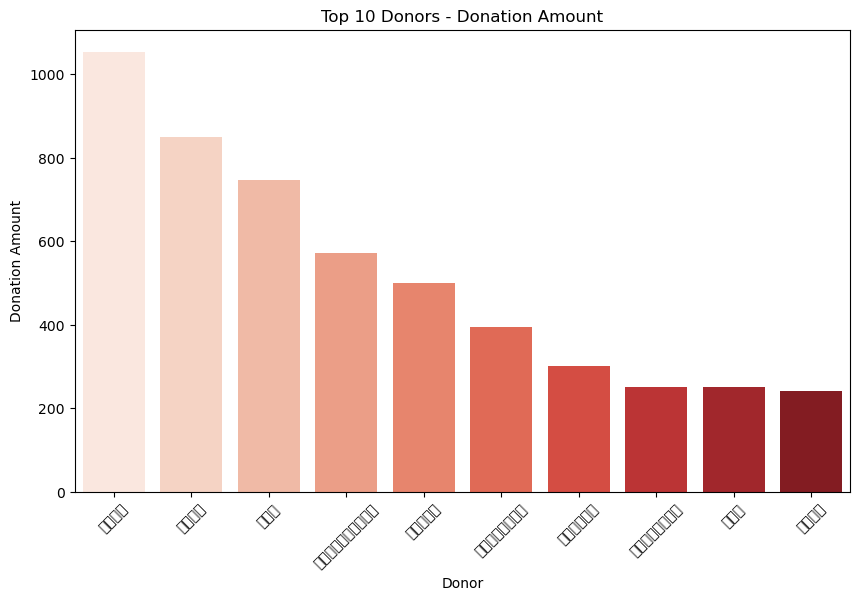

In [196]:
# Use Seaborn to draw a bar chart of donation amounts
palette = sns.color_palette("Reds", len(top_10_donors))
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_donors, x='Name', y='Total Amount', palette=palette)
plt.xlabel('Donor')
plt.ylabel('Donation Amount')
plt.title('Top 10 Donors - Donation Amount')
plt.xticks(range(len(top_10_donors)), top_10_donors['Name'],rotation=45)
plt.show()